# Chapter 3 Vectorizer and Machine learning in NLP


# ดาวโหลด library

In [ ]:
!pip install pythainlp[full]
!pip install scikit-learn
!pip install pandas 

     |████████████████████████████████| 11.0MB 6.5MB/s 
     |████████████████████████████████| 747kB 43.9MB/s 
     |████████████████████████████████| 1.5MB 40.3MB/s 
     |████████████████████████████████| 133kB 43.8MB/s 
     |████████████████████████████████| 296kB 46.4MB/s 
     |████████████████████████████████| 1.7MB 42.9MB/s 
     |████████████████████████████████| 870kB 44.9MB/s 
     |████████████████████████████████| 2.1MB 40.3MB/s 
     |████████████████████████████████| 1.3MB 45.8MB/s 
     |████████████████████████████████| 645kB 35.4MB/s 
     |████████████████████████████████| 481kB 37.0MB/s 
     |████████████████████████████████| 143kB 44.0MB/s 
     |████████████████████████████████| 1.2MB 41.3MB/s 
     |████████████████████████████████| 133kB 47.4MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 3.3MB 40.8MB/s 
     |████████████████████████████████| 92kB 12.7MB/s 
     |████████████████████████████████| 276kB 45.3M

# Download wisesight-sentiment Dataset 

ไฟล์ที่โหลดจะมีทั้งหมด 4 ไฟล์ ซึ่งมี 


1.   train.txt        : ไฟล์ข้อความ train
2.   train_label.txt  : ไฟล์อธิบาย sentiment ของข้อความ train
3.   test.txt         : ไฟล์ข้อความ test
4.   test_label.txt   : ไฟล์อธิบาย sentiment ของข้อความ train



In [ ]:
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train_label.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test_label.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test.txt

--2021-04-16 06:26:25--  https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5658270 (5.4M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   5.40M  --.-KB/s    in 0.1s    

2021-04-16 06:26:26 (46.8 MB/s) - ‘train.txt’ saved [5658270/5658270]

--2021-04-16 06:26:26--  https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train_label.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

# Data preparation

ดาวโหลดข้อมูลด้วย pandas 

In [ ]:
import pandas as pd 
df_train = pd.read_csv('train.txt','\n',header = None)
df_train_label = pd.read_csv('train_label.txt','\n',header = None )


df_test = pd.read_csv('test.txt','\n',header = None )
df_test_label = pd.read_csv('test_label.txt','\n',header = None )


รวมข้อมูล ชุด label และ text เข้าด้วยกัน

In [ ]:
df_train['label'] = df_train_label
df_train.columns = ['text','label']
df_train.dropna(inplace=True)

df_test['label'] = df_test_label
df_test.columns = ['text','label']


In [ ]:
df_train

,text,label
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu
1,คะ,neu
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg
3,😅😅😅,neu
4,สวัสดีวันพุธ แนน อะไรนะ,neu
...,...,...
24058,แม่งควายล้วนนน,neg
24059,ดอยสุเทพน้องง ไปหมดแล้วววว #pm25,neg
24060,ค่าชุดอาจจะแพงกว่าส่วนลด,neg
24061,รัฐต้องการแค่ภาษีครับ,neu


เช็คจำนวน Data train and test

In [ ]:
print(df_train.shape)
print(df_test.shape)

(24063, 2)
(2674, 2)


In [ ]:
df_all_values = df_train.label.value_counts().to_frame()
df_all_values.columns = ['label_train']
df_all_values['label_test'] = df_test.label.value_counts()
df_all_values['percentage_train'] = df_all_values.label_train.apply(lambda x : x /df_all_values.sum()[0])
df_all_values['percentage_test'] = df_all_values.label_test.apply(lambda x : x /df_all_values.sum()[1])
df_all_values

,label_train,label_test,percentage_train,percentage_test
neu,13105,1456,0.544612,0.544503
neg,6140,683,0.255164,0.255423
pos,4300,478,0.178698,0.178758
q,518,57,0.021527,0.021316


In [ ]:
df_train.loc[df_train.label == 'q'].sample(5)

,text,label
7817,ร่วมรายการสี่ช่องหรือเปล่าคะ,q
10200,อยู่ชมแพมีไหม,q
9182,เงินดาวแค่19000จะส่งเดือนเท่าไรคับ,q
23736,Mamondeเท่าไหร่คะ,q
7309,จองรีโว่สักคันได้ก่อคับขอเกียร์ออโต้น่ะคับขอรา...,q


In [ ]:
df_train.loc[df_train.label == 'pos'].sample(5)

,text,label
19635,อยากโดนสักจอก,pos
3651,ไปๆ วันจันนะ,pos
13709,ไปกินกันเหอะหิว,pos
41,คนอะไรใจร้ายเหมือนหน้าตา 😭😭😭😭,pos
3911,อยากได้ยาริส,pos


In [ ]:
df_train.loc[df_train.label == 'neg'].sample(5)

,text,label
4025,ทำไมมีแต่คนชอบ เคลนซิ่งของกานิเย่ สูตร Oil inf...,neg
9070,ขับรถใหญ่ๆแล้วมาขับนิสสันมาร์ชนี่แบบอึดอัด5555...,neg
20930,สาขาไอทีสแควร์หลักสี่ ไปตอน6โมงเย็น ผักไม่มีมา...,neg
1655,ต้องบุหรี่ไฟฟ้า โทษทันที,neg
8851,รอฟังผลก่อนนนน ถถถถ ขอโปรด,neg


In [ ]:
df_train.loc[df_train.label == 'neu'].sample(5)

,text,label
6756,ใหม่เผยโฉมแล้ว ยืนยันเอกลักษณ์ 2+1 ประตูเช่นเค...,neu
21870,กอย,neu
20324,เบียร์ไหน เอาดีๆ ช้าง ลีโอ สิงห์,neu
1904,หักดิบยากครับลองมาหลายครั้งละ,neu
11775,เป็นเจ้าของ #Honda_BRV วันนี้ มีแต่ได้ กับได้ ...,neu


# Feature Extraction Bag-of-words (BOW) model

*   Count Vectorizer 
*   TF-IDF Vectorizer 




Count Vectorizer 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pythainlp

count_vec = CountVectorizer(tokenizer = pythainlp.tokenize.word_tokenize)
cvec = count_vec.fit_transform(df_train.text)
cvec_df = pd.DataFrame(cvec.toarray())
print(cvec_df.shape)


(24063, 28884)


In [ ]:
cvec_df.columns = count_vec.vocabulary_.keys()
cvec_df

,ประเทศ,เรา,ผลิต,และ,ส่งออก,ยาสูบ,เยอะ,สุด,ใน,โลก,จิง,ป่าว,คับ,คะ,อิ,เหี้ย,ออม,ทำ,กู,อยาก,กิน,เอ็ม,เค,😅😅😅,สวัสดี,วัน,พุธ,,แนน,อะไร,นะ,ก้อน,ขอบพระคุณ,มาก,ๆ,คร้าบ,ที่,มาหา,ชมเชย,การ,...,คลื่นเหียน,ประยุกต์ใช้,ขั้นแรก,เสร็จสิ้น,makkasan,singhafood,าน,2765,janenumber,basketball,หนี้บุญคุณ,แทบตาย,2049,"คัท""",johnniewalkerblacklabelthedirectorscut,venus,dao,chor,ถ้าว่า,22.09,หน่วยกู้ภัย,กจ,8298,คู่กรณี,กวร,#明南邦救恤部,การเตือนสติ,ความระมัดระวัง,ละเมิด,ความสะเทือนใจ,นส.,บิ้วท์,sit,tobeno,pak,บวง,ชนะใจ,า😊,ลดราวาศอก,ผิดพวก
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24059,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = pythainlp.tokenize.word_tokenize)
tfidf_vec = tfidf.fit_transform(df_train.text).toarray()
tfidf_df = pd.DataFrame(tfidf_vec)
tfidf_vec.shape

(24063, 28884)

In [ ]:
tfidf_df.columns = tfidf.vocabulary_.keys()
tfidf_df

,ประเทศ,เรา,ผลิต,และ,ส่งออก,ยาสูบ,เยอะ,สุด,ใน,โลก,จิง,ป่าว,คับ,คะ,อิ,เหี้ย,ออม,ทำ,กู,อยาก,กิน,เอ็ม,เค,😅😅😅,สวัสดี,วัน,พุธ,,แนน,อะไร,นะ,ก้อน,ขอบพระคุณ,มาก,ๆ,คร้าบ,ที่,มาหา,ชมเชย,การ,...,คลื่นเหียน,ประยุกต์ใช้,ขั้นแรก,เสร็จสิ้น,makkasan,singhafood,าน,2765,janenumber,basketball,หนี้บุญคุณ,แทบตาย,2049,"คัท""",johnniewalkerblacklabelthedirectorscut,venus,dao,chor,ถ้าว่า,22.09,หน่วยกู้ภัย,กจ,8298,คู่กรณี,กวร,#明南邦救恤部,การเตือนสติ,ความระมัดระวัง,ละเมิด,ความสะเทือนใจ,นส.,บิ้วท์,sit,tobeno,pak,บวง,ชนะใจ,า😊,ลดราวาศอก,ผิดพวก
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.183957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24058,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24059,0.0,0.0,0.0,0.0,0.0,0.142009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24060,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24061,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Supervised Machine learning in NLP
Text classificaiton

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sci

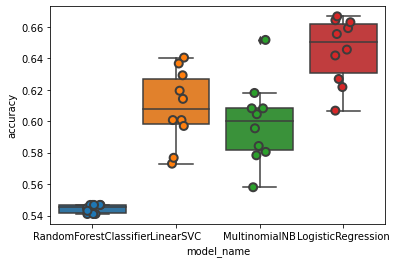

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, count_vec.transform(df_test['text']), df_test['label'], scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


ดู accuracy โดยรวมของทุกๆ model 

In [ ]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending = False)

model_name
LogisticRegression        0.645102
LinearSVC                 0.608832
MultinomialNB             0.598727
RandomForestClassifier    0.544506
Name: accuracy, dtype: float64

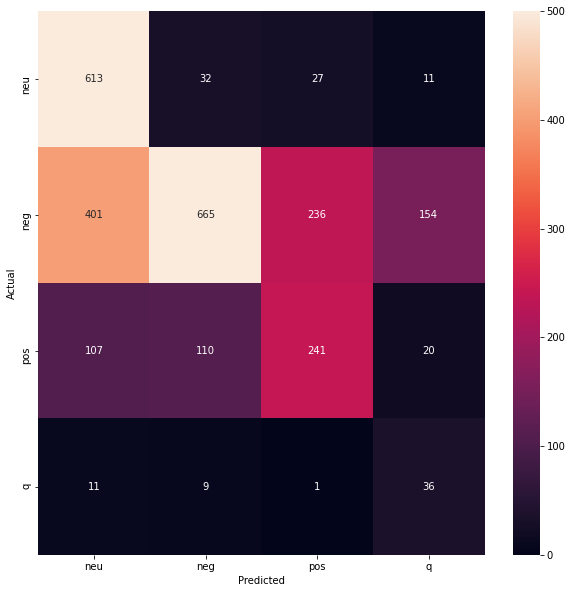

In [ ]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
model = LinearSVC(random_state = 0)

model.fit(tfidf_vec, df_train.label)

X_test = count_vec.transform(df_test['text'])

y_pred = model.predict(X_test)
y_test = df_test.label
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
label_name = list(df_train.label.unique())

sns.heatmap(conf_mat, annot=True, fmt='d',vmin=0, vmax=500,xticklabels = label_name, yticklabels =label_name)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(df_test.label, y_pred))


              precision    recall  f1-score   support

         neg       0.73      0.72      0.72       683
         neu       0.72      0.83      0.77      1456
         pos       0.57      0.36      0.44       478
           q       0.53      0.18      0.26        57

    accuracy                           0.70      2674
   macro avg       0.64      0.52      0.55      2674
weighted avg       0.69      0.70      0.69      2674



# Unsupervised Machine learning in NLP 


*   Topic modelling 



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(tokenizer = pythainlp.tokenize.word_tokenize, max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df_train.text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()



# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(tokenizer = pythainlp.tokenize.word_tokenize, max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(df_train.text)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 20
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


ดูผลลัพท์ของ topic modeling

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        

no_top_words = 10


In [ ]:
display_topics(nmf, tfidf_feature_names, no_top_words)


Topic 0:
  - ที่ และ ใน 2 ( ) บาท 3
Topic 1:
จะ ก็ มัน ที่ ว่า ได้ เป็น แต่ ให้ ของ
Topic 2:
กิน ลีโอ เค จะ เอ็ม พา ช้าง 5555 ละ นน
Topic 3:
ไป พา กัน หน่อย ไหน ด้วย ก่อน เอา หมด วัน
Topic 4:
# !   สวย ท้า แป้ง ที่ แดด sangsom สงกรานต์
Topic 5:
ครับ ผม ขอ สู้ มาสด้า นิสสัน เท่าไหร่ ร่า รถ นาวา
Topic 6:
ค่ะ ^^ สาขา ขอ นะคะ ร่วม รายการ มาก โลตัส ลูกค้า
Topic 7:
เบียร์ ช้าง สิงห์ ลีโอ ขวด แดก ยู ดื่ม พี่ พี
Topic 8:
ๆ มาก สู้ กัน สุด พี่ ชอบ คับ เฉย ดี
Topic 9:
เลย มาก หิว เห็น นี้ ยัง ยย เหมือน จ้า นี่
Topic 10:
มี มั้ย สาขา บ้าง ที่ โปร ตัง คับ แต่ ไหน
Topic 11:
อยาก กก จัง ลอง อ่ะ ให้ เค้า ก แดก กิน
Topic 12:
นะ ด้วย รอ คร้าบ ก่อน นี้ น่าจะ แต่ ขอ อยู่
Topic 13:
ไม่ ได้ ยัง ใช่ แต่ ชอบ อร่อย อ่ะ เคย เอา
Topic 14:
555 หิว เลี้ยง + ตัง สิ ก่อน แดก กว่า มึง
Topic 15:
. / :// https www com th http : =
Topic 16:
ไหม คะ มั้ย ได้ เท่าไหร่ ? นี้ ร่วม สาขา ขอ
Topic 17:
จัด ต้อง นี้ ให้ วัน ดิ สิ วันนี้ 5555 มั้ย
Topic 18:
ก้อน บาบี พี่ น บา บิ คร้าบ บี หมู บาร์
Topic 19:
มา แล้ว เอา กก ลอง รอ ซ

In [ ]:
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
  ไม่ ก็ แต่ ได้ ว่า จะ มี มัน แล้ว
Topic 1:
มั้ย มี หรอ สิ ? ที ๆๆ ลูก เอา ท
Topic 2:
ค่ะ   สาขา มี ขอ นะคะ ^^ mk ได้ ร่วม
Topic 3:
ๆ ไป ไหน มา อ่ะ วัน จะ นี้ กัน พอ
Topic 4:
ส น รอบ เม เท ดำ อ มิ อร เบล
Topic 5:
  ที่ รถ ใช้ เป็น กับ มา ตัว ใน เลย
Topic 6:
ชอบ สวย รถ สี เลือก ก่อน สุด โตโยต้า toyota รุ่น
Topic 7:
. / ก้อน :// com https www บาบี http :
Topic 8:
#   จัด แป้ง นี้ ! นาง ดี สวย มา
Topic 9:
  ให้ ไป ที่ มา เรา ไม่ เลย ได้ ๆ
Topic 10:
  กิน เบียร์ ช้าง ไป อยาก 555 ไม่ แดก สิงห์
Topic 11:
กู กก มึง แล้ว มาสด้า อีก หมด จ้า มา ไร
Topic 12:
ค่า ว ย ภาพ เซ ์ อยากได้ ตา ลา ร์
Topic 13:
และ ที่ การ   ใน ของ ได้ ช่วย ให้ เป็น
Topic 14:
ไหม ...   เลย ผิว ออก 5555 หน้า นิ ไม่
Topic 15:
  - ที่ ( ) 1 " 2 บาท ใน
Topic 16:
ครับ แพง ​ นิสสัน ร่า ซื้อ นาวา นะ โดน แสน
Topic 17:
คะ แม่ ง ทำไม อะ ไม่ ตัง บี เหรอ ยัง
Topic 18:
คับ บุหรี่ งง พี่ หน่อย มะเร็ง ไฟฟ้า เลี้ยง มัน ยา
Topic 19:
  ใช้ เลย ลอง มาก ผ้าอนามัย รี ออ แบบ รอ


In [ ]:









สวัสดีครับ กินข้าวรึยังครับ
